In [1]:
import pandas as pd



In [15]:
data=pd.read_csv("output/index_with_topics.csv")
text=data["parsed_text"]
clusters=data["topics"]
path=data["path"]

In [19]:
text

0       calcolatori elettronici complementi esercizi r...
1       stefano mattoccia ricevimento appuntamento via...
2       valore logico assume cosa necessario garantire...
3       esercizio registro bit uscita tri state utiliz...
4       soluzione rete tratteggiata latch dotato uscit...
                              ...                        
3440    analisi sorgenti dati finanziari dati giuridic...
3441    struttura schema mediato schema mediato vision...
3442                  arlecchino system arlecchino system
3443    tecnologie arlecchino system schema matching p...
3444    architettura arlecchino system parsingcleaning...
Name: parsed_text, Length: 3445, dtype: object

In [17]:
topic_to_count=dict()
topic_to_path=dict()
topic_to_top_words=dict()
for i in range(0,len(data)):
    
    if clusters[i] not in topic_to_count:
        topic_to_count[clusters[i]]=0
        topic_to_path[clusters[i]]=[]
    topic_to_count[clusters[i]]+=1
    topic_to_path[clusters[i]].append(path[i])

topic_to_count = dict(sorted(topic_to_count.items(), key=lambda x: x[1], reverse=True))

topic_to_count


{'[0, 1, 2, 3, 4]': 770,
 '[9]': 345,
 '[5]': 208,
 '[3]': 186,
 '[7]': 185,
 '[1]': 173,
 '[4]': 158,
 '[0]': 154,
 '[2]': 136,
 '[8]': 130,
 '[6]': 98,
 '[5, 9]': 53,
 '[0, 9]': 39,
 '[1, 9]': 35,
 '[0, 5]': 31,
 '[3, 9]': 31,
 '[7, 9]': 30,
 '[4, 9]': 24,
 '[8, 9]': 24,
 '[0, 3]': 23,
 '[2, 5]': 21,
 '[1, 3]': 21,
 '[1, 4]': 20,
 '[2, 9]': 19,
 '[6, 9]': 19,
 '[3, 5]': 19,
 '[4, 7]': 19,
 '[5, 7]': 18,
 '[2, 7]': 17,
 '[0, 7]': 17,
 '[2, 6]': 15,
 '[5, 8]': 15,
 '[3, 4]': 15,
 '[0, 2]': 14,
 '[3, 8]': 14,
 '[3, 7]': 14,
 '[4, 5]': 13,
 '[0, 6]': 13,
 '[1, 7]': 13,
 '[2, 3]': 12,
 '[1, 2]': 12,
 '[0, 1]': 12,
 '[3, 6]': 11,
 '[4, 8]': 10,
 '[2, 4]': 10,
 '[1, 8]': 10,
 '[0, 4]': 10,
 '[4, 6]': 9,
 '[7, 8]': 9,
 '[5, 6]': 9,
 '[1, 5]': 9,
 '[6, 7]': 8,
 '[2, 8]': 6,
 '[3, 5, 9]': 6,
 '[1, 2, 9]': 5,
 '[1, 6]': 5,
 '[4, 5, 9]': 5,
 '[6, 8]': 5,
 '[4, 8, 9]': 5,
 '[0, 8]': 4,
 '[0, 5, 9]': 4,
 '[0, 3, 9]': 4,
 '[3, 8, 9]': 4,
 '[0, 4, 7]': 4,
 '[3, 4, 9]': 3,
 '[1, 5, 9]': 3,
 '[3, 7, 9

In [66]:
import json

path="analytics/top_topics/topic_to_doc.json"


# Open a file in write mode
with open(path ,'w') as file:
    # Write the dictionary to the file in formatted JSON
    json.dump(topic_to_count, file, indent=4)

In [21]:
print(len(text))
print(len(clusters))

3445
3445


# ANalisi occorrenza delle parole per topic

In [46]:
import ast
import numpy as np
topic_to_words=dict()
i=0
vuoti=0
lista_topics_vuoti=[]
for i in range(0,len(text)-1):
    
    
    topic=clusters[i]
    
    try:
        
        words=text[i].split(" ")
    
        if topic not in topic_to_words:
            topic_to_words[topic]=[]
        for w in words:
            topic_to_words[topic].append(w)
    except AttributeError:
            
            vuoti+=1
            lista_topics_vuoti.append(topic)
    
import json

path="analytics/top_words/topic_words.json"


# Open a file in write mode
with open(path ,'w') as file:
    # Write the dictionary to the file in formatted JSON
    json.dump(topic_to_words, file, indent=4)
    

In [42]:
bar_plot_view=dict()
for k in topic_to_words.keys():
    bar_plot_view[k]=len(topic_to_words[k])

bar_plot_view_sort = dict(sorted(bar_plot_view.items(), key=lambda item: item[1],reverse=True))

print(bar_plot_view_sort)


{'[9]': 14640, '[5]': 7639, '[8]': 7639, '[1]': 7620, '[3]': 6916, '[7]': 6874, '[4]': 6699, '[0]': 5044, '[2]': 4935, '[6]': 3732, '[0, 1, 2, 3, 4]': 3650, '[5, 9]': 3596, '[1, 9]': 1810, '[2, 3]': 1741, '[3, 9]': 1636, '[0, 9]': 1586, '[1, 3]': 1390, '[1, 7]': 1348, '[7, 9]': 1155, '[4, 7]': 1123, '[2, 9]': 1078, '[2, 6]': 1069, '[4, 9]': 1061, '[1, 4]': 1013, '[8, 9]': 1009, '[0, 3]': 1006, '[2, 5]': 943, '[0, 7]': 925, '[0, 5]': 873, '[2, 7]': 866, '[1, 2]': 767, '[5, 7]': 759, '[4, 5]': 746, '[5, 8]': 705, '[4, 8, 9]': 697, '[6, 9]': 682, '[3, 8]': 662, '[2, 4]': 617, '[1, 3, 6, 8]': 614, '[3, 7]': 586, '[3, 5]': 581, '[0, 1]': 559, '[1, 8]': 551, '[3, 4]': 487, '[0, 2]': 459, '[4, 6]': 457, '[3, 6]': 454, '[5, 6]': 421, '[7, 8]': 411, '[0, 6]': 394, '[4, 8]': 389, '[1, 5]': 380, '[1, 2, 9]': 352, '[3, 5, 9]': 338, '[2, 8]': 337, '[3, 8, 9]': 335, '[0, 5, 9]': 329, '[1, 6]': 322, '[6, 7]': 312, '[0, 4, 7]': 311, '[0, 4]': 291, '[1, 5, 7, 9]': 279, '[2, 3, 9]': 274, '[4, 5, 9]': 24

In [43]:
import json

path="analytics/top_words/topic_to_word_len.json"


# Open a file in write mode
with open(path ,'w') as file:
    # Write the dictionary to the file in formatted JSON
    json.dump(bar_plot_view_sort, file, indent=4)

In [44]:
import json

# Open the JSON file in read mode
with open(path, 'r') as file:
    # Load the JSON data into a dictionary
    my_dict = json.load(file)

# Access and use the dictionary as needed


{'[9]': 14640, '[5]': 7639, '[8]': 7639, '[1]': 7620, '[3]': 6916, '[7]': 6874, '[4]': 6699, '[0]': 5044, '[2]': 4935, '[6]': 3732, '[0, 1, 2, 3, 4]': 3650, '[5, 9]': 3596, '[1, 9]': 1810, '[2, 3]': 1741, '[3, 9]': 1636, '[0, 9]': 1586, '[1, 3]': 1390, '[1, 7]': 1348, '[7, 9]': 1155, '[4, 7]': 1123, '[2, 9]': 1078, '[2, 6]': 1069, '[4, 9]': 1061, '[1, 4]': 1013, '[8, 9]': 1009, '[0, 3]': 1006, '[2, 5]': 943, '[0, 7]': 925, '[0, 5]': 873, '[2, 7]': 866, '[1, 2]': 767, '[5, 7]': 759, '[4, 5]': 746, '[5, 8]': 705, '[4, 8, 9]': 697, '[6, 9]': 682, '[3, 8]': 662, '[2, 4]': 617, '[1, 3, 6, 8]': 614, '[3, 7]': 586, '[3, 5]': 581, '[0, 1]': 559, '[1, 8]': 551, '[3, 4]': 487, '[0, 2]': 459, '[4, 6]': 457, '[3, 6]': 454, '[5, 6]': 421, '[7, 8]': 411, '[0, 6]': 394, '[4, 8]': 389, '[1, 5]': 380, '[1, 2, 9]': 352, '[3, 5, 9]': 338, '[2, 8]': 337, '[3, 8, 9]': 335, '[0, 5, 9]': 329, '[1, 6]': 322, '[6, 7]': 312, '[0, 4, 7]': 311, '[0, 4]': 291, '[1, 5, 7, 9]': 279, '[2, 3, 9]': 274, '[4, 5, 9]': 24

In [50]:
#topic to word_occurrency
topic_to_word_occ=dict()
for k in topic_to_words.keys():
    word2count = {}
    for word in topic_to_words[k]:
        if word in word2count:
            word2count[word] += 1
        else:
            word2count[word] = 1
    word2count_order = dict(sorted(word2count.items(), key=lambda item: item[1],reverse=True))
    topic_to_word_occ[k]=word2count_order

In [51]:
import json

path="analytics/top_words/topic_to_word_occ.json"


# Open a file in write mode
with open(path ,'w') as file:
    # Write the dictionary to the file in formatted JSON
    json.dump(topic_to_word_occ, file, indent=4)

# Analytics


In [71]:
import matplotlib.pyplot as plt

In [81]:
def create_bar_plot(data,path_to_save):
    data_to_view= list(data.items())[:200]
    x_axis=[]
    y_axis=[]
    for i in data_to_view:
        x_axis.append(i[0])
        y_axis.append(i[1])
    plt.figure(figsize=(60, 10))  # Set the figure size (width, height)
    plt.bar(x_axis, y_axis)

    # Customize the plot
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis', fontsize=1)
    plt.yscale('log')
    plt.title('Topic to count')
    plt.xticks(rotation=90)  # Adjust the rotation angle as needed
    plt.savefig(path_to_save, format='jpeg')
   

## Topic to document occurceny

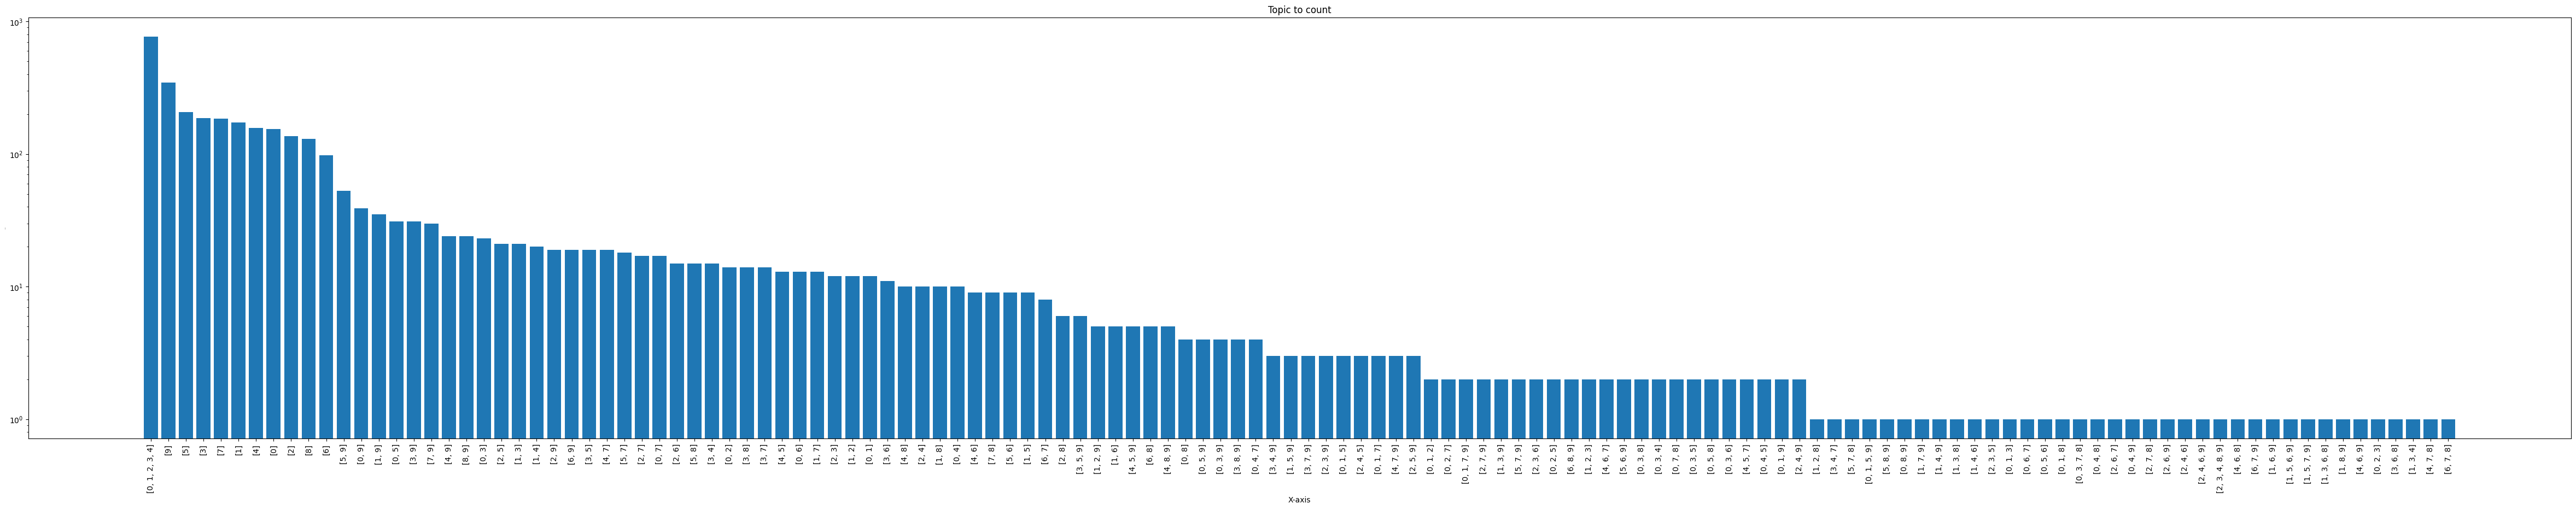

In [83]:
create_bar_plot(topic_to_count,'analytics/top_topics/topic_to_doc.jpg')

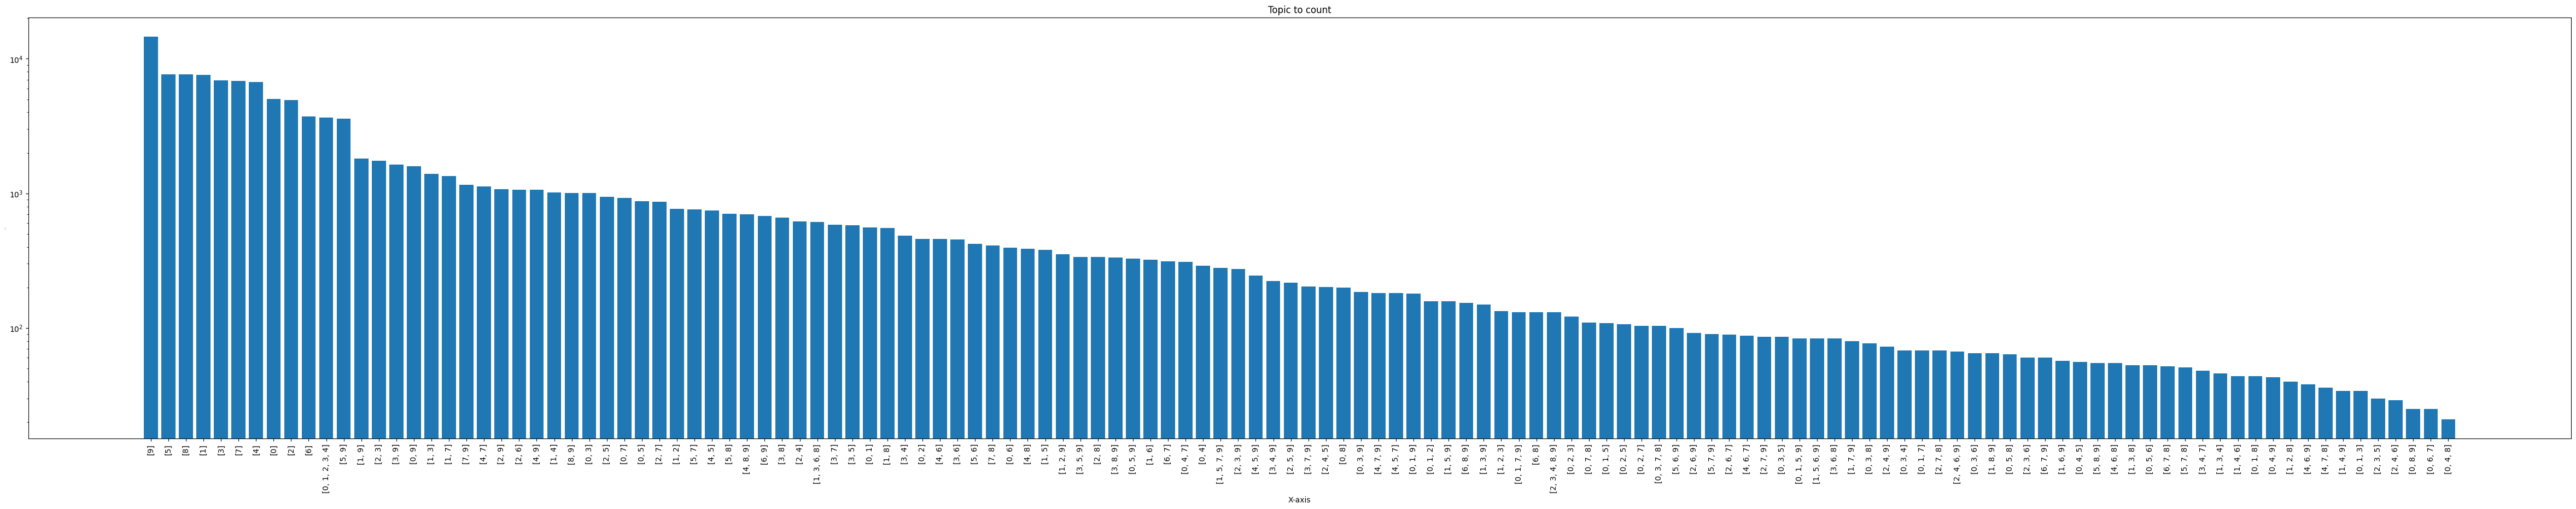

In [82]:
create_bar_plot(bar_plot_view_sort,'analytics/top_words/topic_to_words_number.jpg')

In [90]:
top_10_most_pop_topics=list(topic_to_count.items())[:20]

top_10_most_pop_topic_to_top_ten_words=dict()
for i in top_10_most_pop_topics:
    i=i[0]
    top_10_most_pop_topic_to_top_ten_words[i]=list(topic_to_word_occ[i].items())[:10]

top_10_most_pop_topic_to_top_ten_words

{'[0, 1, 2, 3, 4]': [('system', 41),
  ('esempio', 35),
  ('ingegneria', 30),
  ('dataset', 29),
  ('esempi', 23),
  ('informatica', 22),
  ('lilla', 22),
  ('soluzione', 20),
  ('forza', 18),
  ('caso', 17)],
 '[9]': [('layer', 226),
  ('learning', 136),
  ('feature', 123),
  ('training', 106),
  ('set', 90),
  ('machine', 84),
  ('essere', 84),
  ('universit', 73),
  ('funzione', 73),
  ('modello', 71)],
 '[5]': [('pattern', 78),
  ('due', 75),
  ('training', 74),
  ('error', 63),
  ('distanza', 57),
  ('set', 49),
  ('ogni', 48),
  ('funzione', 46),
  ('valori', 45),
  ('classi', 42)],
 '[3]': [('dataset', 91),
  ('sicuro', 61),
  ('esercizio', 55),
  ('campo', 53),
  ('the', 51),
  ('layer', 41),
  ('set', 34),
  ('superficie', 34),
  ('rischioso', 34),
  ('rete', 33)],
 '[7]': [('due', 36),
  ('numero', 33),
  ('moto', 33),
  ('sistema', 31),
  ('punti', 31),
  ('input', 29),
  ('caso', 28),
  ('momento', 26),
  ('dataset', 24),
  ('ogni', 24)],
 '[1]': [('self', 123),
  ('layer',

In [91]:
import json

path="analytics/top_words/topic_top_10_words.json"


# Open a file in write mode
with open(path ,'w') as file:
    # Write the dictionary to the file in formatted JSON
    json.dump(top_10_most_pop_topic_to_top_ten_words, file, indent=4)

In [93]:
import pandas as pd
df=pd.DataFrame(top_10_most_pop_topic_to_top_ten_words)
df.to_csv("analytics/top_words/top_words_for_topic.csv",index=False)


     [0, 1, 2, 3, 4]              [9]             [5]               [3]  \
0       (system, 41)     (layer, 226)   (pattern, 78)     (dataset, 91)   
1      (esempio, 35)  (learning, 136)       (due, 75)      (sicuro, 61)   
2   (ingegneria, 30)   (feature, 123)  (training, 74)   (esercizio, 55)   
3      (dataset, 29)  (training, 106)     (error, 63)       (campo, 53)   
4       (esempi, 23)        (set, 90)  (distanza, 57)         (the, 51)   
5  (informatica, 22)    (machine, 84)       (set, 49)       (layer, 41)   
6        (lilla, 22)     (essere, 84)      (ogni, 48)         (set, 34)   
7    (soluzione, 20)  (universit, 73)  (funzione, 46)  (superficie, 34)   
8        (forza, 18)   (funzione, 73)    (valori, 45)   (rischioso, 34)   
9         (caso, 17)    (modello, 71)    (classi, 42)        (rete, 33)   

             [7]              [1]               [4]               [0]  \
0      (due, 36)      (self, 123)  (probabilit, 64)       (campo, 64)   
1   (numero, 33)      (layer